### S&P 500 Prediction by Time Series Analysis

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff

In [17]:
# Oldest date is 1928-01-06 (Volume records since 1951-Dec-24)
SP = pd.read_csv('data/S&P500.csv')
SP['Date']= pd.to_datetime(SP['Date'])
SP['Year'] = SP['Date'].dt.year
SP['Month'] = SP['Date'].dt.month
SP['Day'] = SP['Date'].dt.day

# Manually converting 2027 ~ 2072 to Year 1927 ~ 1972 and combine 'Date' again
SP['Year'] = np.where((SP['Year'] >= 2027), SP['Year'] - 100, SP.Year)
SP['Date_adj'] = pd.to_datetime(SP[['Year','Month','Day']])
SP = SP.drop(['Date','Year','Month','Day'], axis=1)
SP = SP.rename(columns = {'Open':'S&P_Open','Close*':'S&P_Close','Volume':'S&P_Volume','Date_adj':'Date'})
SP = SP.set_index('Date')
SP.replace(to_replace=',', value='', inplace=True, regex = True)
SP.replace(to_replace='-', value=np.nan, inplace=True)

In [19]:
SP = SP.astype(float)

In [57]:
SP.head(5)

,S&P_Open,High,Low,S&P_Close,Adj Close**,S&P_Volume
Date,,,,,,
2022-09-02,3994.66,4018.43,3906.21,3924.26,3924.26,4.134920e+09
2022-09-01,3936.73,3970.23,3903.65,3966.85,3966.85,3.754570e+09
2022-08-31,4000.67,4015.37,3954.53,3955.00,3955.00,3.797860e+09
2022-08-30,4041.25,4044.98,3965.21,3986.16,3986.16,3.190580e+09
2022-08-29,4034.58,4062.99,4017.42,4030.61,4030.61,2.963020e+09


In [21]:
print('Dataset Shape: ',  SP.shape)

Dataset Shape:  (23783, 6)


#### Visualizing the Time Series Data

<AxesSubplot:title={'center':'S&P 500 Closing Price'}, xlabel='Date'>

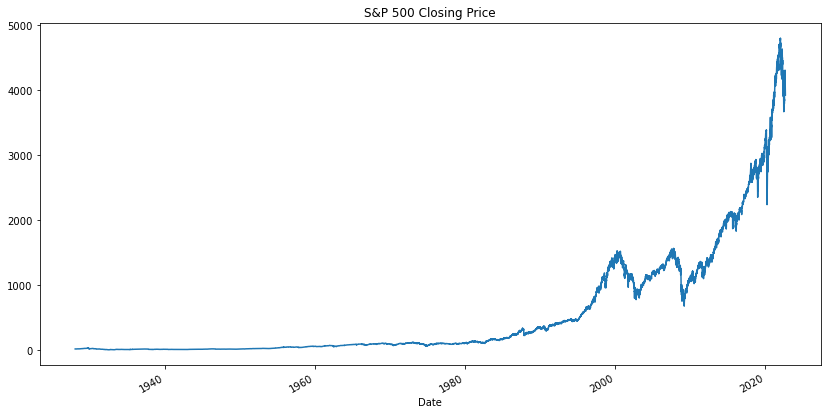

In [13]:
SP['S&P_Close'].plot(figsize=(14,7), title="S&P 500 Closing Price")

#### Handling Missing Values in Time Series Data

In [15]:
#calculating missing values in the dataset

missing_values = SP.isnull().sum()
missing_per = (missing_values/SP.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
S&P_Open,0,0.000000
High,0,0.000000
Low,0,0.000000
S&P_Close,0,0.000000
Adj Close**,0,0.000000
S&P_Volume,5496,23.108943


In [28]:
SP.loc[:'1950-01-05', :]

,S&P_Open,High,Low,S&P_Close,Adj Close**,S&P_Volume
Date,,,,,,
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000.0
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000.0
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000.0
1949-12-30,16.79,16.79,16.79,16.79,16.79,NaN
1949-12-29,16.68,16.68,16.68,16.68,16.68,NaN
...,...,...,...,...,...,...
1928-01-06,17.66,17.66,17.66,17.66,17.66,NaN
1928-01-05,17.55,17.55,17.55,17.55,17.55,NaN
1928-01-04,17.72,17.72,17.72,17.72,17.72,NaN


In [34]:
SP['S&P_Volume'] = SP['S&P_Volume'].fillna(method='ffill')

In [35]:
SP.loc[:'1950-01-05', :]

,S&P_Open,High,Low,S&P_Close,Adj Close**,S&P_Volume
Date,,,,,,
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000.0
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000.0
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000.0
1949-12-30,16.79,16.79,16.79,16.79,16.79,1260000.0
1949-12-29,16.68,16.68,16.68,16.68,16.68,1260000.0
...,...,...,...,...,...,...
1928-01-06,17.66,17.66,17.66,17.66,17.66,1260000.0
1928-01-05,17.55,17.55,17.55,17.55,17.55,1260000.0
1928-01-04,17.72,17.72,17.72,17.72,17.72,1260000.0


### Exploratory Data Analysis

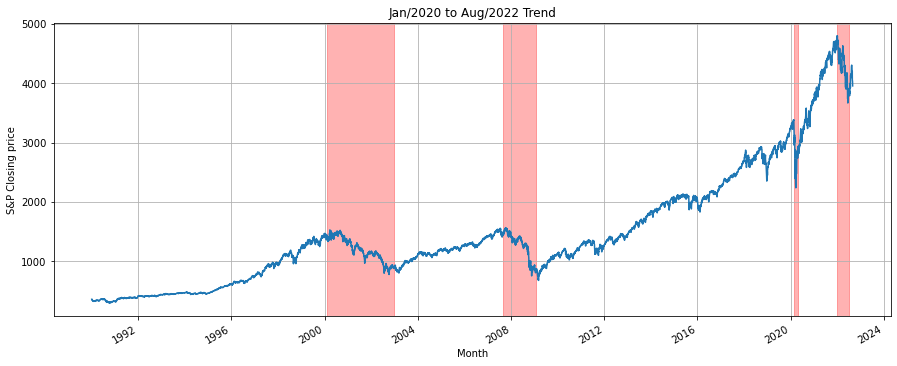

In [49]:
#Zooming in

ax = SP.loc['1990-01-03':'2022-08-31','S&P_Close'].plot(linestyle='-',figsize=(15,6), 
                                                        title="Jan/2020 to Aug/2022 Trend", grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('S&P Closing price')

ax.axvspan('2000-02-01','2002-12-31',color='red', alpha=0.3)
ax.axvspan('2007-09-01','2009-01-31',color='red', alpha=0.3)
ax.axvspan('2020-03-01','2020-04-30',color='red', alpha=0.3)
ax.axvspan('2022-01-02','2022-06-30',color='red', alpha=0.3)

# Visualizing using Lag Plots

Lag plot are used to observe the autocorrelation. These are crucial when we try to correct the trend and stationarity and we have to use smoothing functions. Lag plot helps us to understand the data better.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


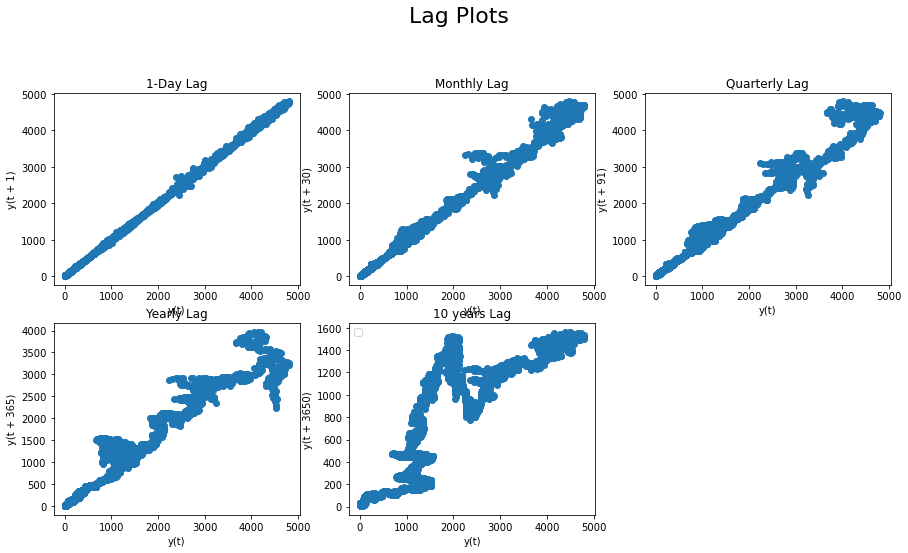

In [53]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(SP['S&P_Close'], lag=1) #day lag
plt.title('1-Day Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(SP['S&P_Close'], lag=30) #monthly lag
plt.title('Monthly Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(SP['S&P_Close'], lag=91) #quarterly lag
plt.title('Quarterly Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(SP['S&P_Close'], lag=365) #yearly lag
plt.title('Yearly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(SP['S&P_Close'], lag=3650) #10years lag
plt.title('10 years Lag')

plt.legend()
plt.show()

We can see that there is a positive correlation for daily, monthly and quarterly lag plots. We observe less correlation for 10 years lag plots.

It makes sense to re-sample our data atmost at the Monthly level, thereby preserving the autocorrelation as well. 

In [55]:
monthly_data = SP.resample('1M').mean()
monthly_data = monthly_data.reset_index()

monthly_data

,Date,S&P_Open,High,Low,S&P_Close,Adj Close**,S&P_Volume
0,1927-12-31,17.660000,17.660000,17.660000,17.660000,17.660000,1.260000e+06
1,1928-01-31,17.520000,17.520000,17.520000,17.520000,17.520000,1.260000e+06
2,1928-02-29,17.324211,17.324211,17.324211,17.324211,17.324211,1.260000e+06
3,1928-03-31,18.233182,18.233182,18.233182,18.233182,18.233182,1.260000e+06
4,1928-04-30,19.371000,19.371000,19.371000,19.371000,19.371000,1.260000e+06
...,...,...,...,...,...,...,...
1133,2022-05-31,4037.780000,4082.188095,3986.214286,4040.360000,4040.360000,4.244197e+09
1134,2022-06-30,3908.924286,3942.405238,3864.070000,3898.946667,3898.946667,4.133289e+09
1135,2022-07-31,3893.241000,3931.058000,3866.241000,3911.729500,3911.729500,3.401057e+09
1136,2022-08-31,4164.375652,4189.813043,4136.988261,4158.563043,4158.563043,3.395153e+09


# Plotting using Plotly

Plotly allows us to make interactve charts which are pretty useful in financial analysis. 

* The **range-sliders** can be used to zoom-in and zoom-out.
* The **range-selectors** can be used to select the range.

In [66]:
import plotly.express as px

SP.reset_index(inplace=True)
fig = px.line(monthly_data, x='Date', y='S&P_Close', title='S&P_Close')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

In [67]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Candlestick(x= monthly_data.Date,
                    open=monthly_data['S&P_Open'],
                    high=monthly_data['High'],
                    low=monthly_data['Low'],
                    close=monthly_data['S&P_Close']))
fig.show()

# Time Series Decomposition & Statistical Tests

We can decompose a time series into trend, seasonal amd remainder components, as mentioned in the earlier section. The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.
The seasonal_decompose in statsmodels is used to implements the decomposition.

We will then perform some statistical tests like [KPSS](http://en.wikipedia.org/wiki/KPSS_test) and [Augmented Dickey–Fuller](http://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) tests to check stationarity. 

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\Irene\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\Irene\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



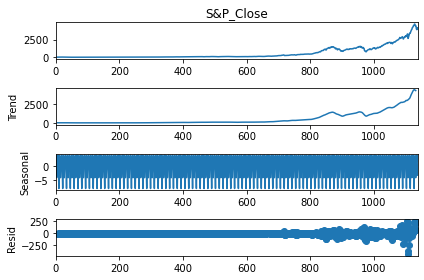

<Figure size 1080x864 with 0 Axes>

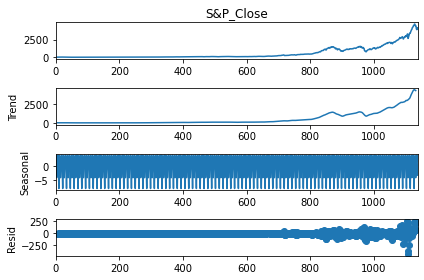

In [88]:
plt.figure(figsize=(15,12))
series = monthly_data['S&P_Close']
result = seasonal_decompose(series, model='additive',period=12)
result.plot()

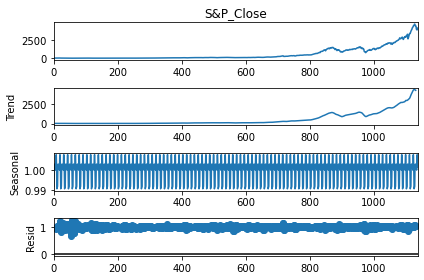

<Figure size 1080x864 with 0 Axes>

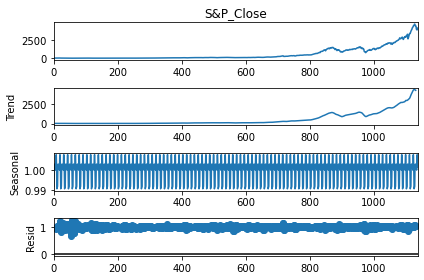

In [90]:
plt.figure(figsize=(15,12))
series = monthly_data['S&P_Close']
result = seasonal_decompose(series, model='multiplicative',period=12)
result.plot()

Post time series decomposition we don't observe any seasonality. Also, there is no constant mean, variance and covariance, hence the series is Non Stationary. We will perform statistical tests like KPSS and ADF to confirm our understanding.

But first, let's plot ACF and PACF graphs.

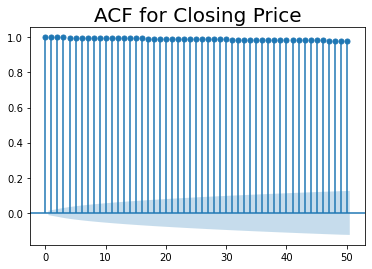

In [71]:
acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Closing Price", size=20)
plt.show()

The above graph shows that effect barely detoriate over time, so past values affect the present ones. The more lags we include, the better our model will fit the dataset, now the risk is coefficients might predict the dataset too well, cause an overfitting.
In our model, we always try to include only those lags which have a direct effect on our present value. Hence, let's try PACF.

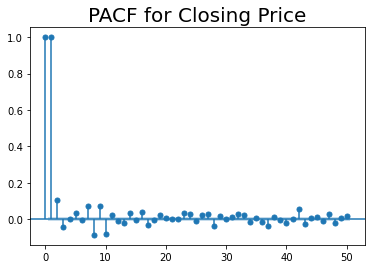

In [72]:
plot_pacf(series, lags=50, alpha=0.05, method='ols')
plt.title("PACF for Closing Price", size=20)
plt.show()

<a id="subsection-four"></a>
# KPSS Test

The KPSS test, short for, Kwiatkowski-Phillips-Schmidt-Shin (KPSS), is a type of Unit root test that tests for the stationarity of a given series around a deterministic trend.

Here, the null hypothesis is that the series is **stationary**.

That is, if p-value is < signif level (say 0.05), then the series is non-stationary and vice versa.

In [91]:
stats, p, lags, critical_values = kpss(series, 'ct')

C:\Users\Irene\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

C:\Users\Irene\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [93]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics : 0.8457684125249839
p-value : 0.01
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


# Interpreting KPSS test results

The output of the KPSS test contains 4 things:

* The KPSS statistic
* p-value
* Number of lags used by the test
* Critical values

The **p-value** reported by the test is the probability score based on which you can decide whether to reject the null hypothesis or not. If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.

The **KPSS statistic** is the actual test statistic that is computed while performing the test.

The number of **lags** reported is the number of lags of the series that was actually used by the model equation of the kpss test.

In order to reject the null hypothesis, the test statistic should be greater than the provided critical values. If it is in fact higher than the target critical value, then that should automatically reflect in a low p-value.
That is, if the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value.

# ADF Test

The only difference here is the Null hypothesis which is just opposite of KPSS.

The null hypothesis of the test is the presence of **unit root**, that is, the series is **non-stationary**.

In [95]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)
    
    if p > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

In [96]:
adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                    4.124818
p-value                           1.000000
#Lags Used                       22.000000
Number of Observations Used    1115.000000
Critical Value (1%)              -3.436228
Critical Value (5%)              -2.864136
Critical Value (10%)             -2.568152
dtype: float64
Series is Stationary


# Conclusion


KPSS says series is not stationary and ADF says series is stationary. It means series is **difference stationary**, we will use **differencing** to make series stationary.